In [2]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import basics_library 

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# POLYS

## Regression

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
degrees = [1,3,10]
betas = [10**(-4),10**(-3),10**(-2)]

# loop over degrees and fit
runs = []
for d in degrees:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # split into training and validation sets
    mylib1.make_train_valid_split(train_portion = 1)

    # choose cost
    mylib1.choose_cost(name = 'least_squares')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'polys',degree = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 1,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))

<IPython.core.display.Javascript object>


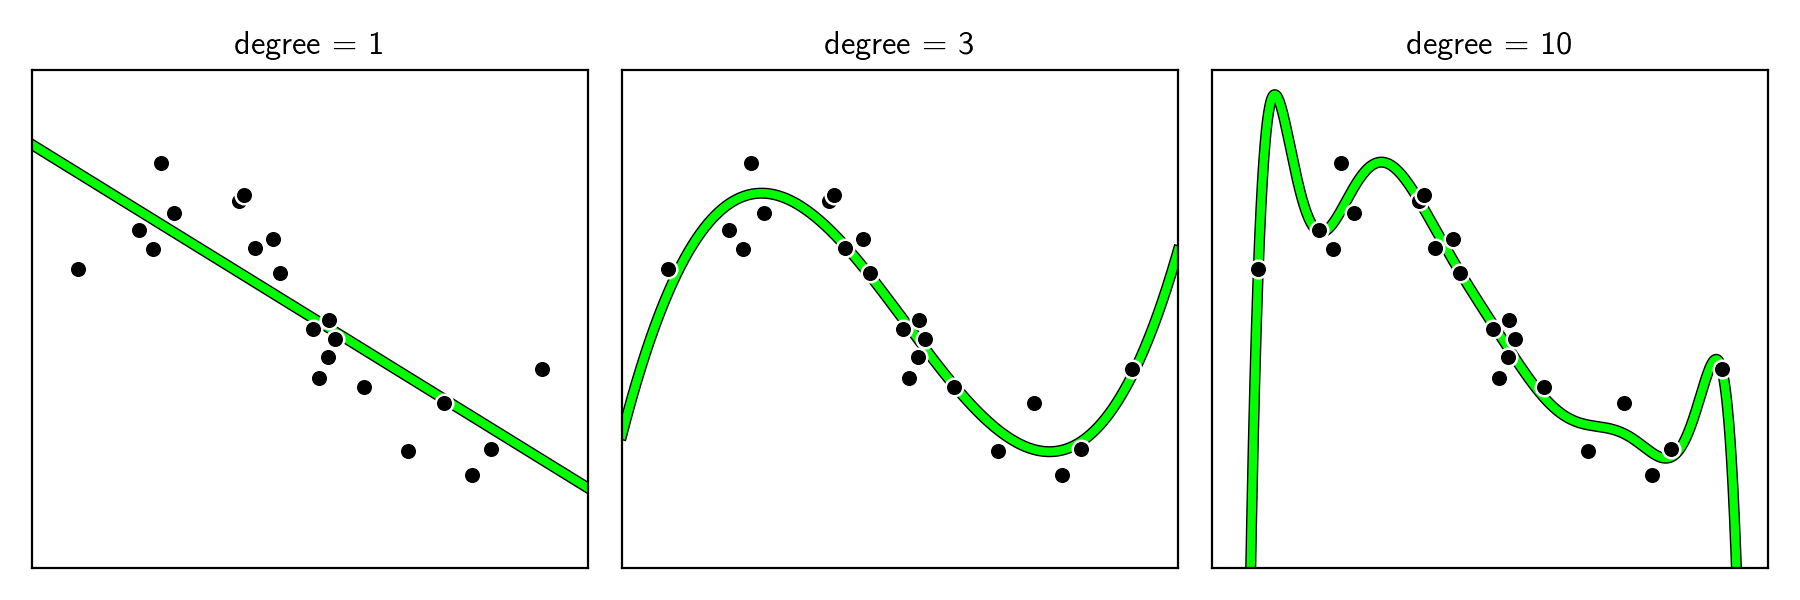

In [6]:
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['degree = ' + str(d) for d in degrees]
demo.show_regression_runs(runs,labels = labels)

## Two-class classification

In [70]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + 'new_circle_data.csv'
# csvname = datapath + '2_eggs.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
degs = [1,2,7]

# loop over degrees and fit
runs = []
for d in degs:
    print (d)
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'none')

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'polys',degree = d,scale = 0)

    # fit an optimization
    max_its = 1000
    if d > 1:
        max_its = 5000
    mylib1.fit(name = 'gradient_descent',max_its = max_its,alpha_choice = 10**(-2),verbose = False)

    # store
    runs.append(copy.deepcopy(mylib1))

1
2
7


<IPython.core.display.Javascript object>


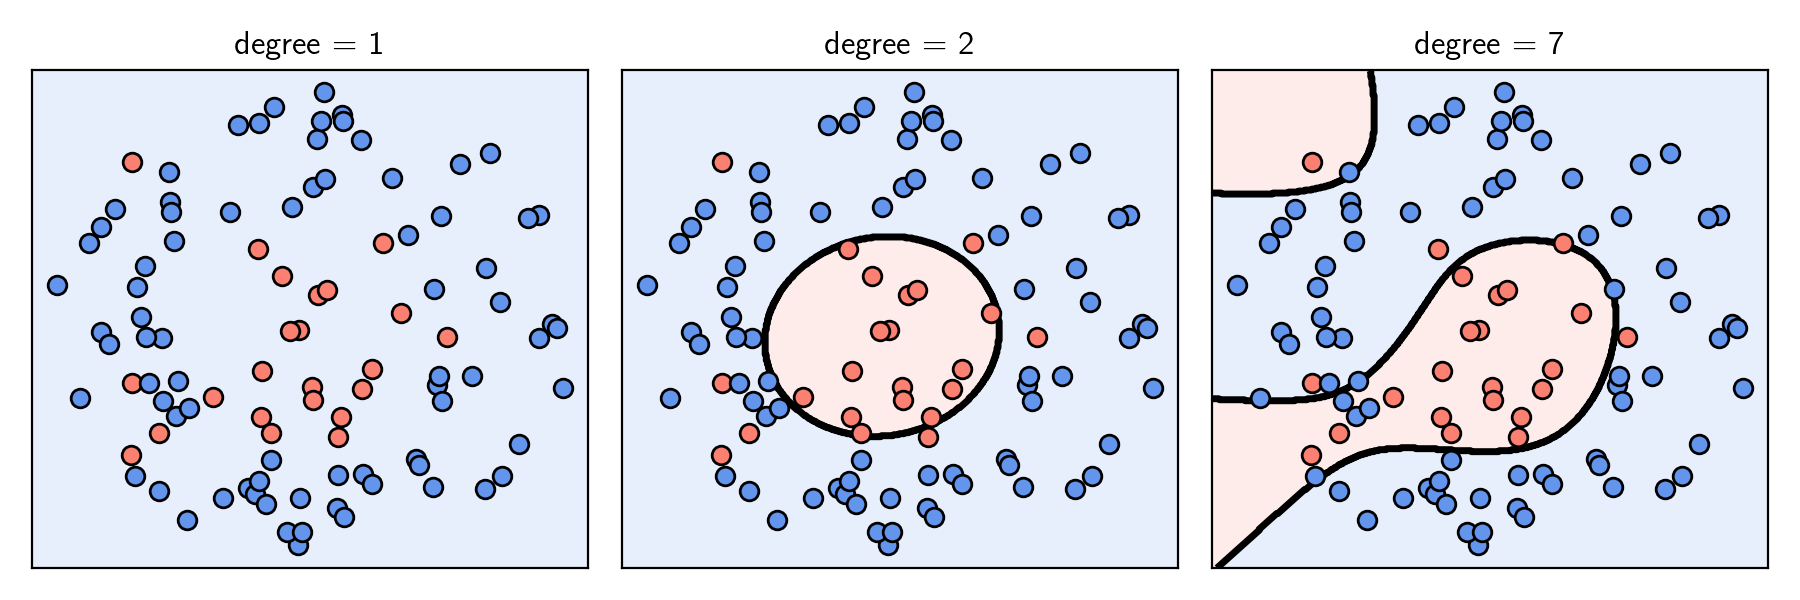

In [71]:
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['degree = ' + str(d) for d in degs]
demo.show_twoclass_runs(runs,labels = labels)

## Multi-class

In [79]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + '2eggs_multiclass.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
degrees = [2,5,7]

# loop over degrees and fit
runs = []
for d in degrees:
    print (d)
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'none')

    # choose cost
    mylib1.choose_cost(name = 'multiclass_softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'polys',degree = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'gradient_descent',max_its = 2000,alpha_choice = 10**(-1),verbose = False)

    # store
    runs.append(copy.deepcopy(mylib1))

2
5
7


<IPython.core.display.Javascript object>


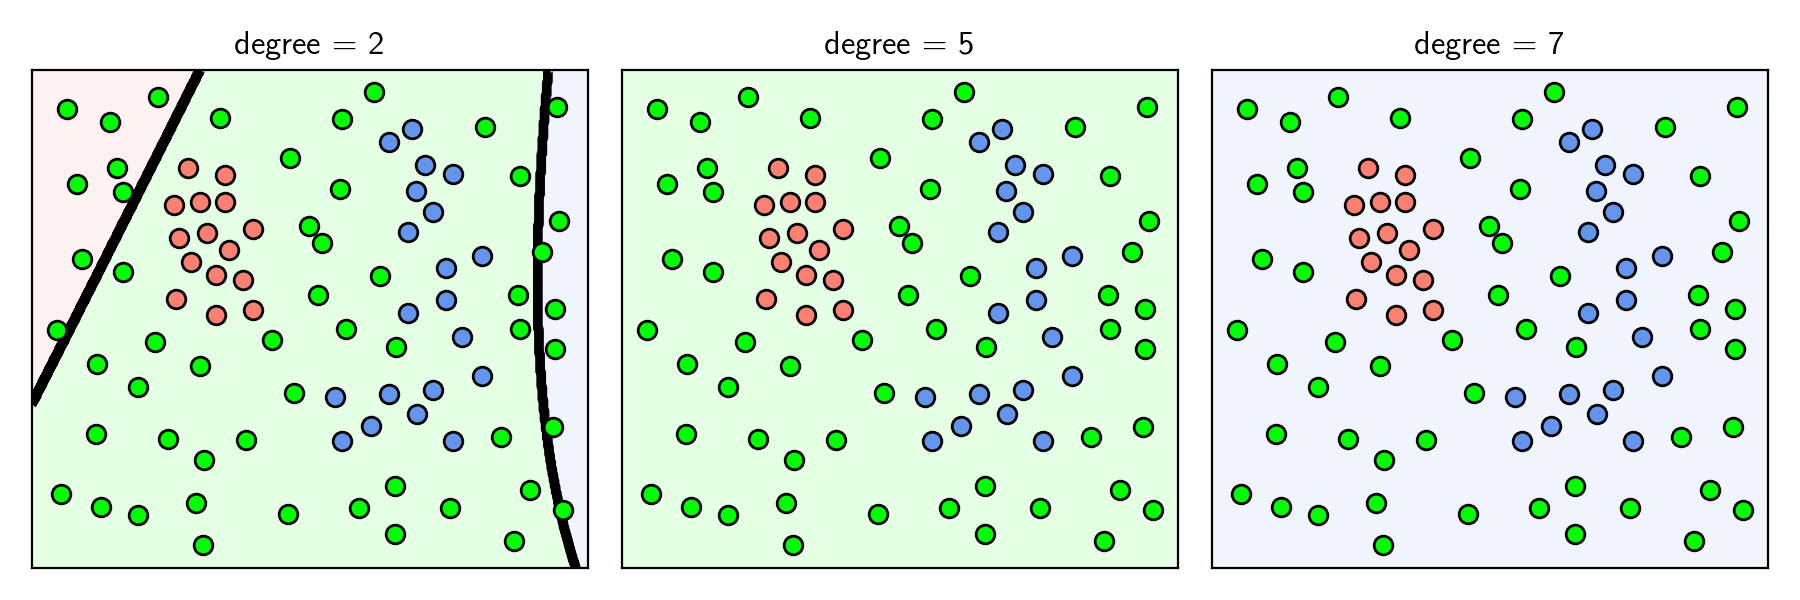

In [80]:
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['degree = ' + str(d) for d in degrees]
demo.show_multiclass_runs(runs,labels = labels)

# GAUSSIAN

## Regression

<IPython.core.display.Javascript object>


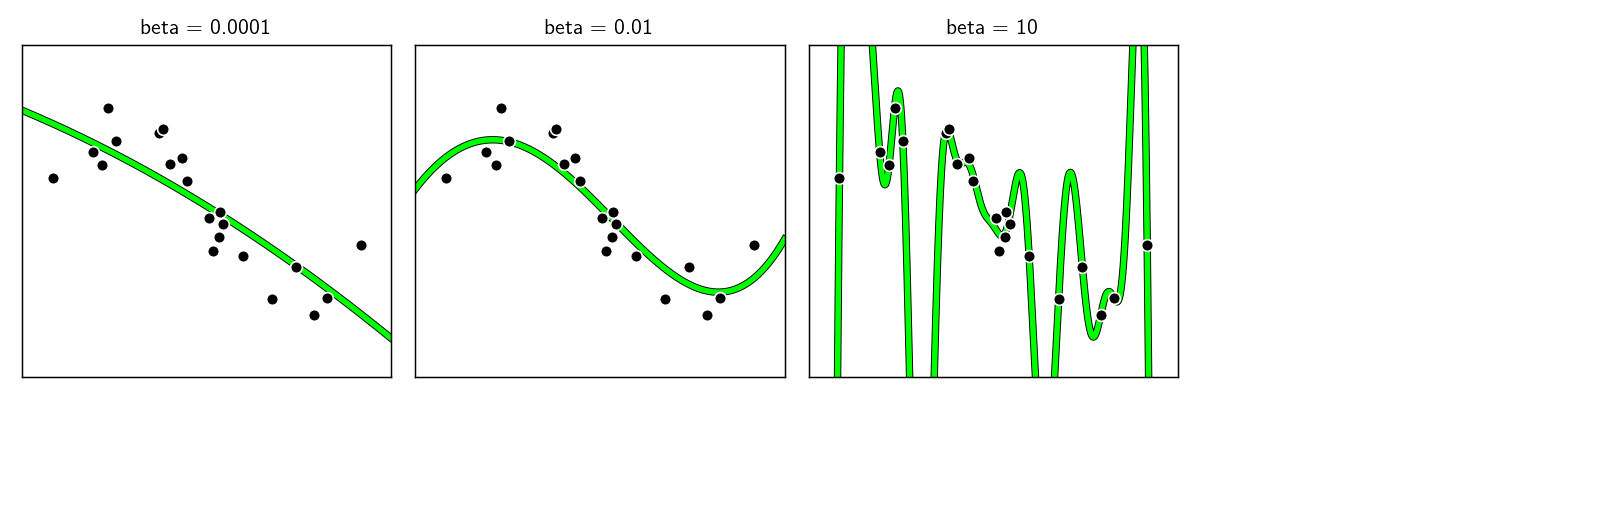

<IPython.core.display.Javascript object>


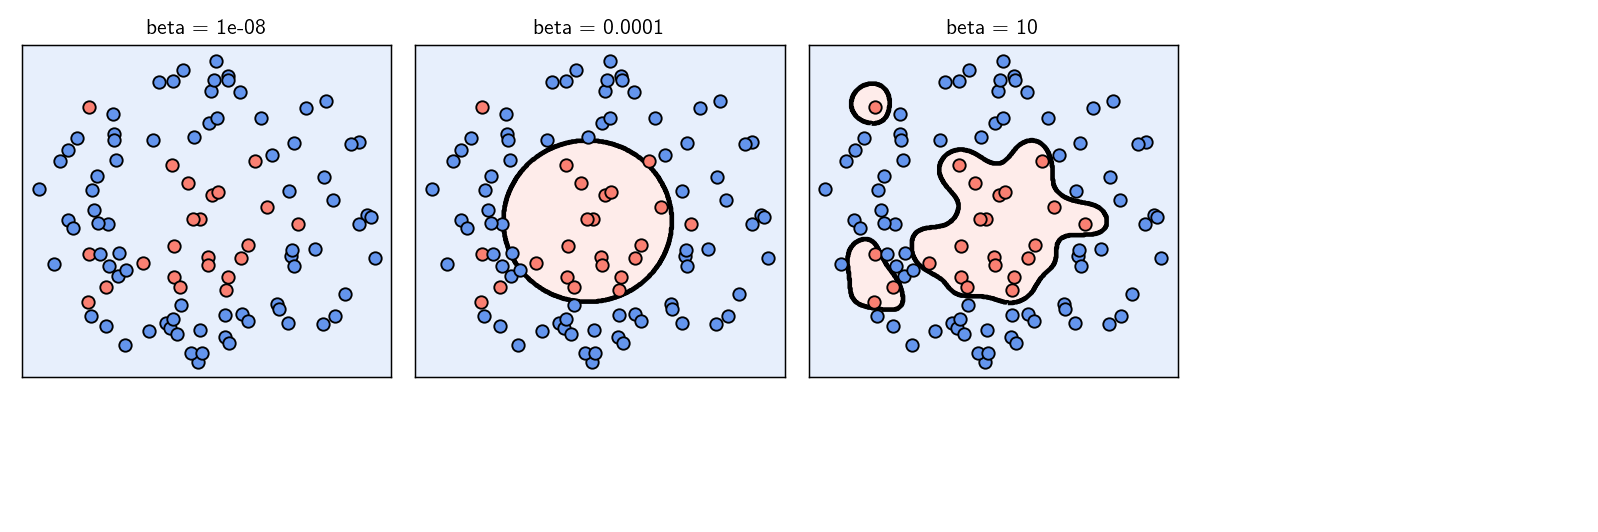

<IPython.core.display.Javascript object>


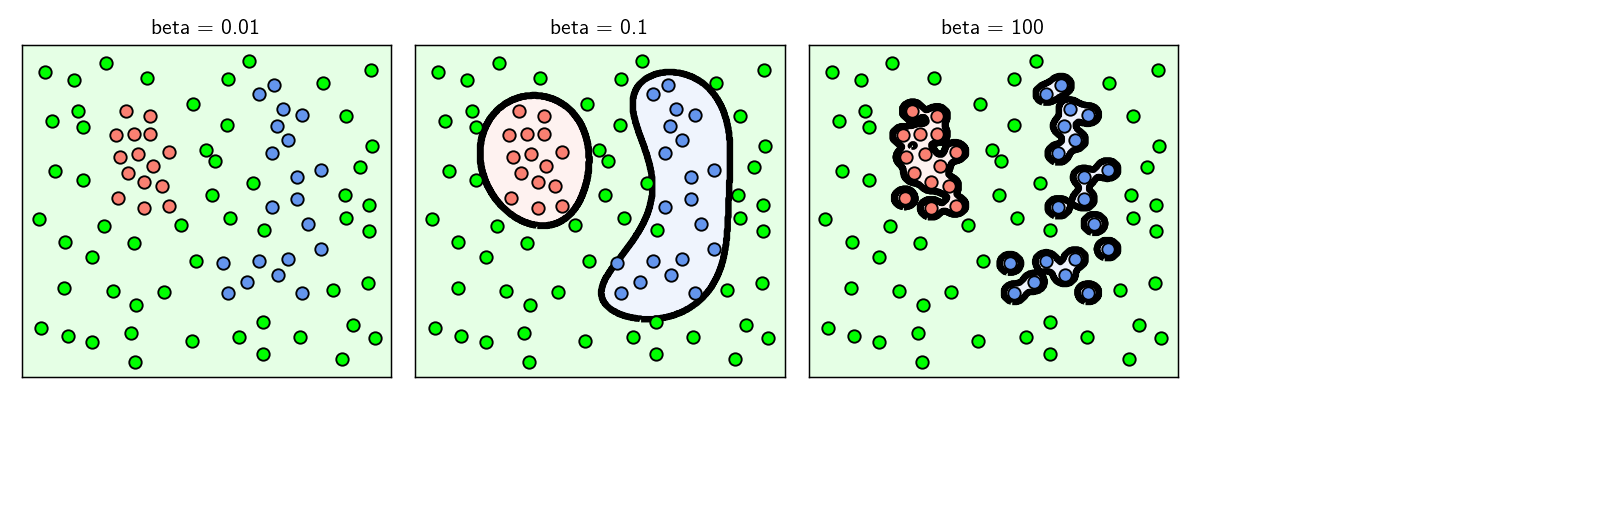

In [79]:
# This code cell will not be shown in the HTML version of this notebook
#### regression example ####
# import data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-4),10**(-2),10**(1)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # split into training and validation sets
    mylib1.make_train_valid_split(train_portion = 1)

    # choose cost
    mylib1.choose_cost(name = 'least_squares')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 1,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_regression_runs(runs,labels = labels)

#### two-class classification example ####
# import data
csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-8),10**(-4),10**(1)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_twoclass_runs(runs,labels = labels)


### multi-class classification ###
# import data
csvname = datapath + '2eggs_multiclass.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-2),10**(-1),10**(2)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'multiclass_softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-6))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_multiclass_runs(runs,labels = labels)

<IPython.core.display.Javascript object>


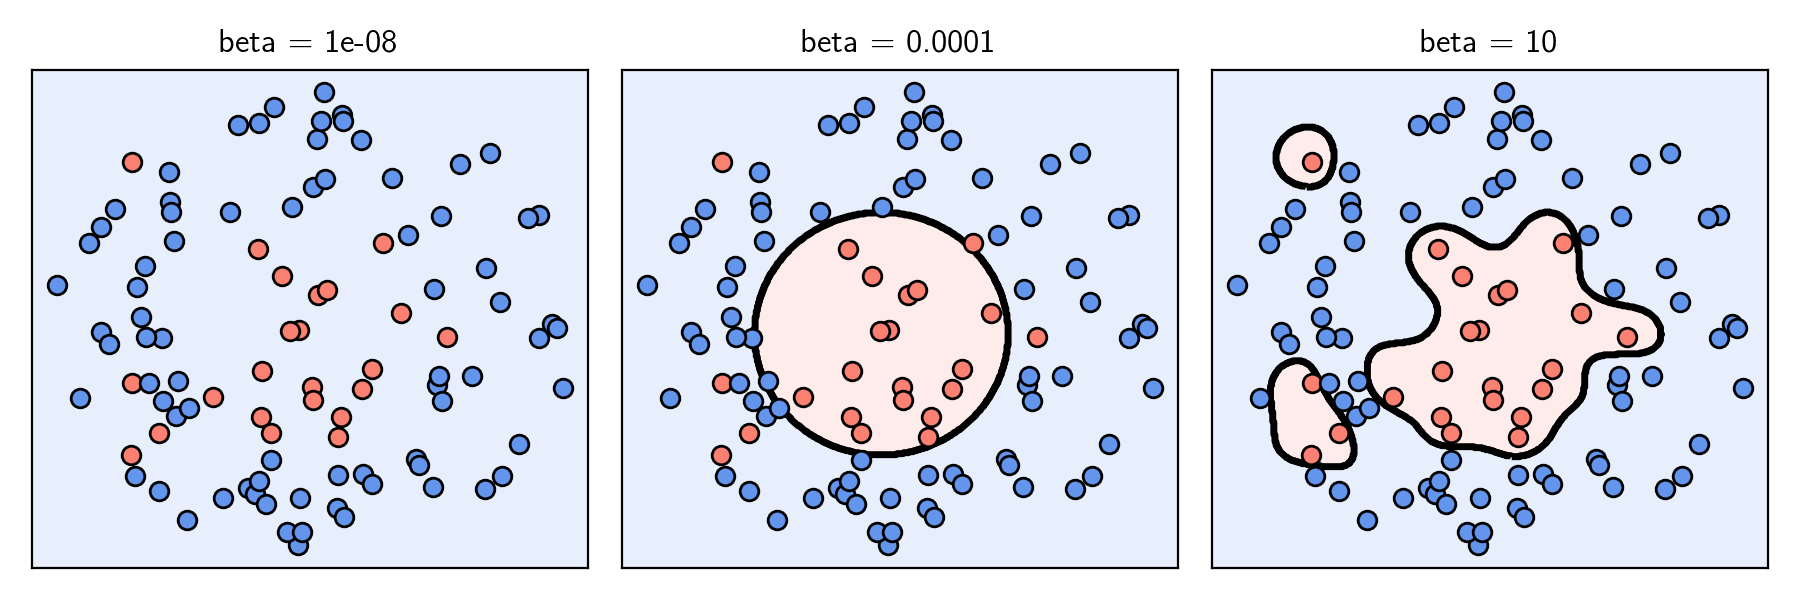

In [82]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-8),10**(-4),10**(1)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_twoclass_runs(runs,labels = labels)

## Multi-class

<IPython.core.display.Javascript object>


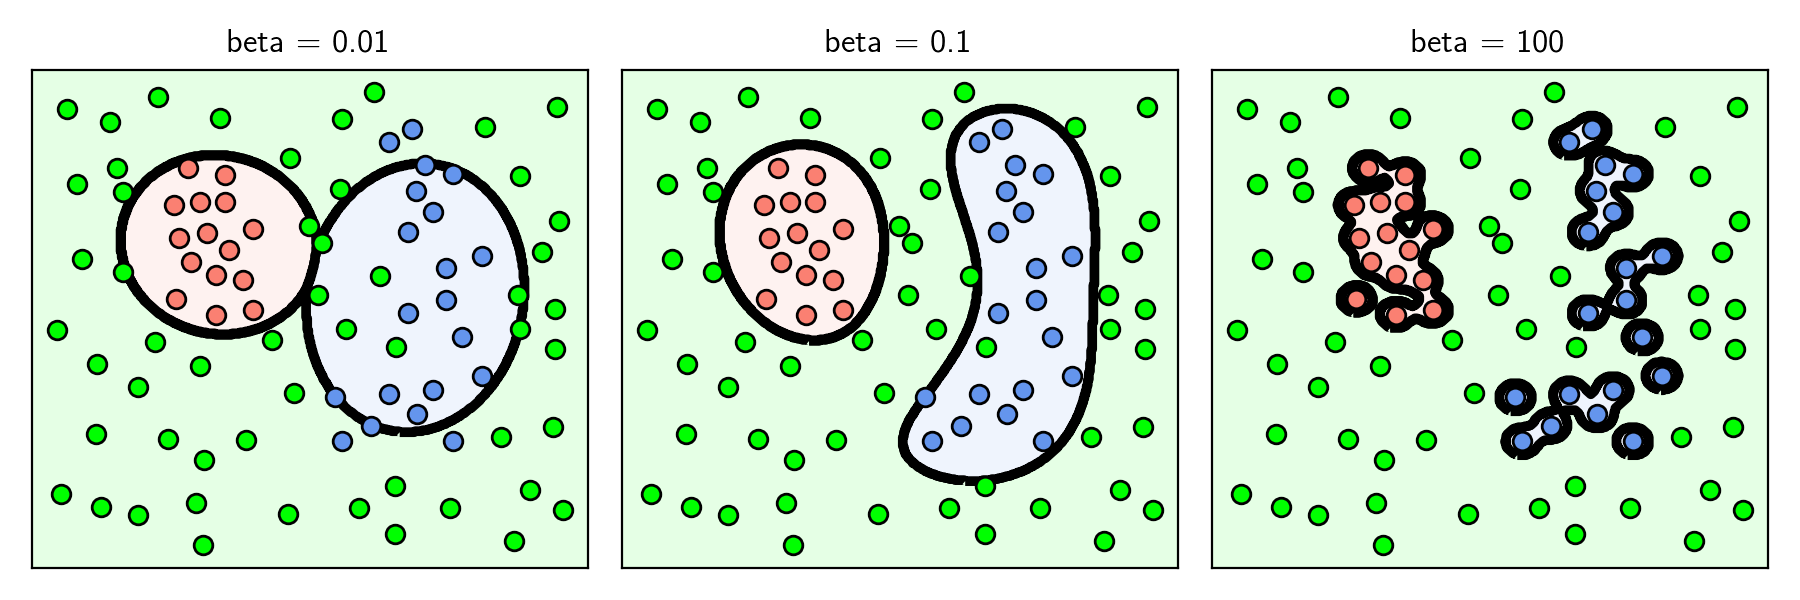

In [85]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + '2eggs_multiclass.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-2),10**(-1),10**(2)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'multiclass_softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-6))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_multiclass_runs(runs,labels = labels)

# RANDOM

## Regression

In [52]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
degrees = [1,20,1000]

# loop over degrees and fit
runs = []
for d in degrees:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.random_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'none')

    # split into training and validation sets
    mylib1.make_train_valid_split(train_portion = 1)

    # choose cost
    mylib1.choose_cost(name = 'least_squares')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(D = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 1,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
 
# plot
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['degree = ' + str(d) for d in degrees]
demo.show_regression_runs(runs,labels = labels)

<IPython.core.display.Javascript object>


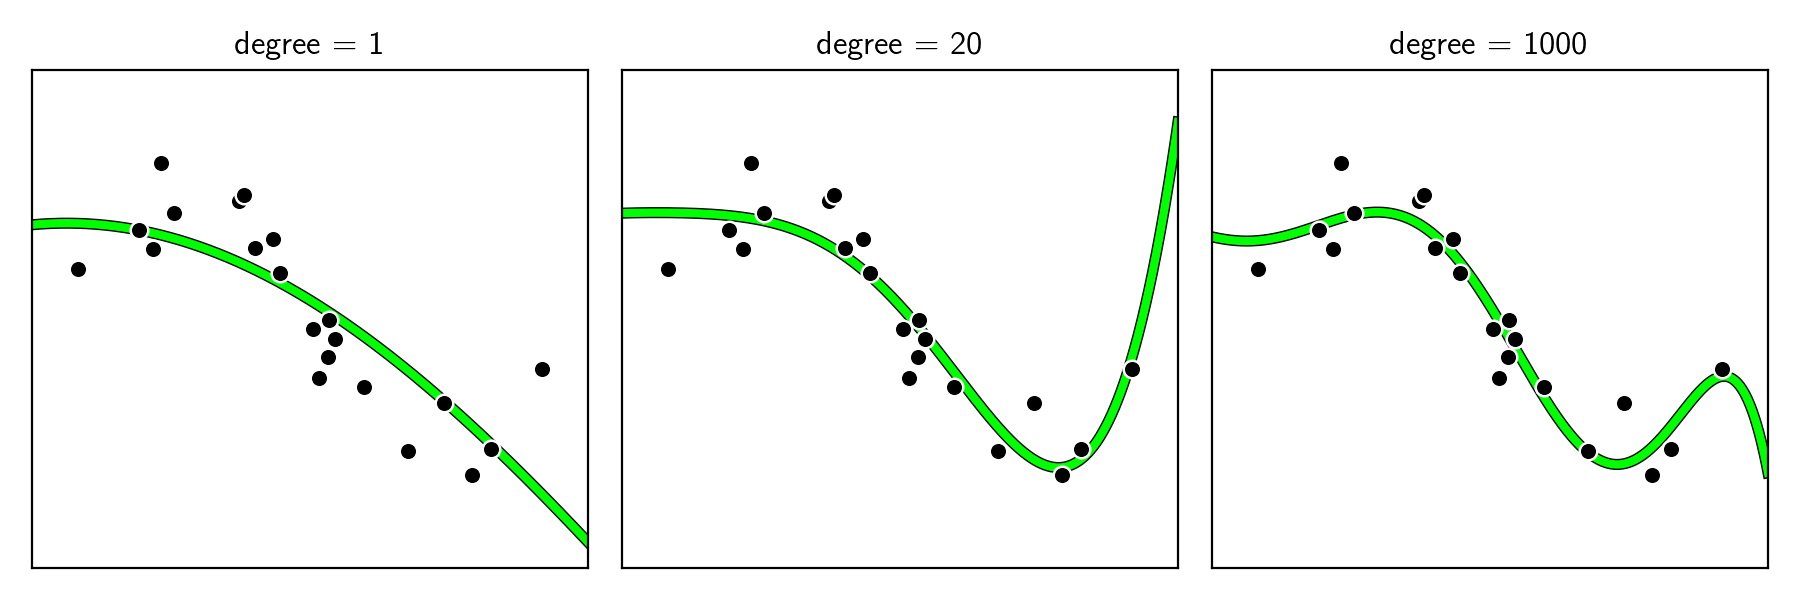

<IPython.core.display.Javascript object>


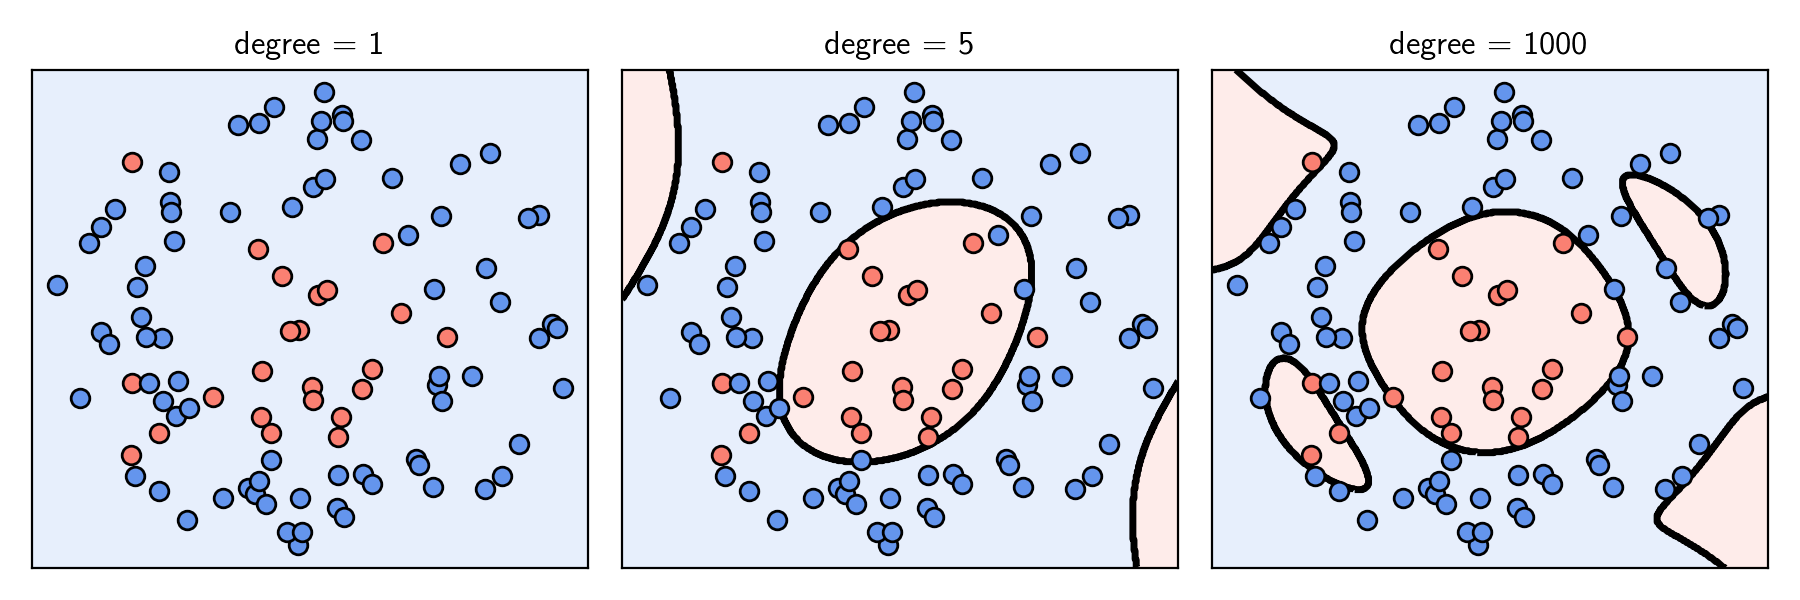

In [63]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
degrees = [1,5,1000]

# loop over degrees and fit
runs = []
for d in degrees:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.random_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'none')

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(D = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['degree = ' + str(d) for d in degrees]
demo.show_twoclass_runs(runs,labels = labels)

<IPython.core.display.Javascript object>


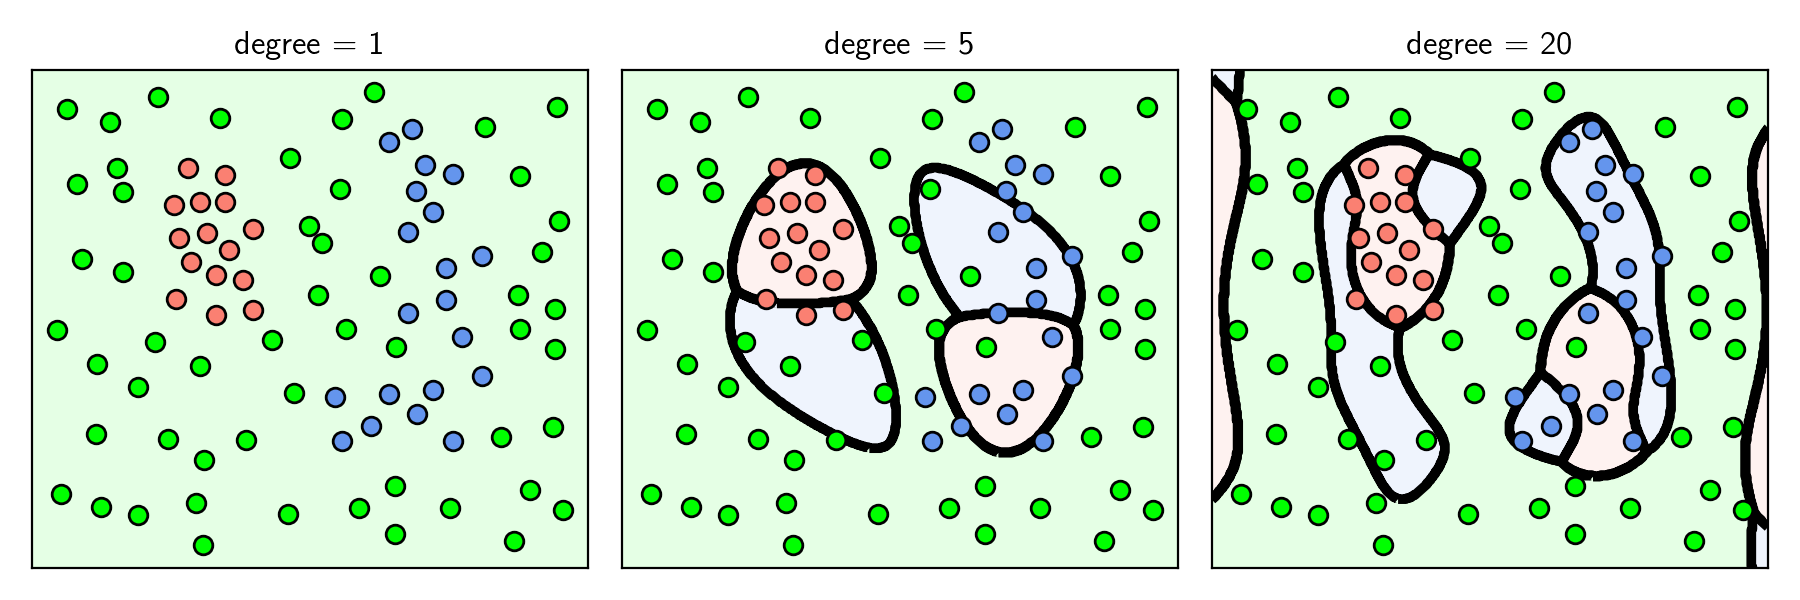

In [76]:
# This code cell will not be shown in the HTML version of this notebook
# import data
csvname = datapath + '2eggs_multiclass.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
degrees = [1,5,20]

# loop over degrees and fit
runs = []
for d in degrees:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.random_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'multiclass_softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(D = d,scale = 0.1)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['degree = ' + str(d) for d in degrees]
demo.show_multiclass_runs(runs,labels = labels)

<IPython.core.display.Javascript object>


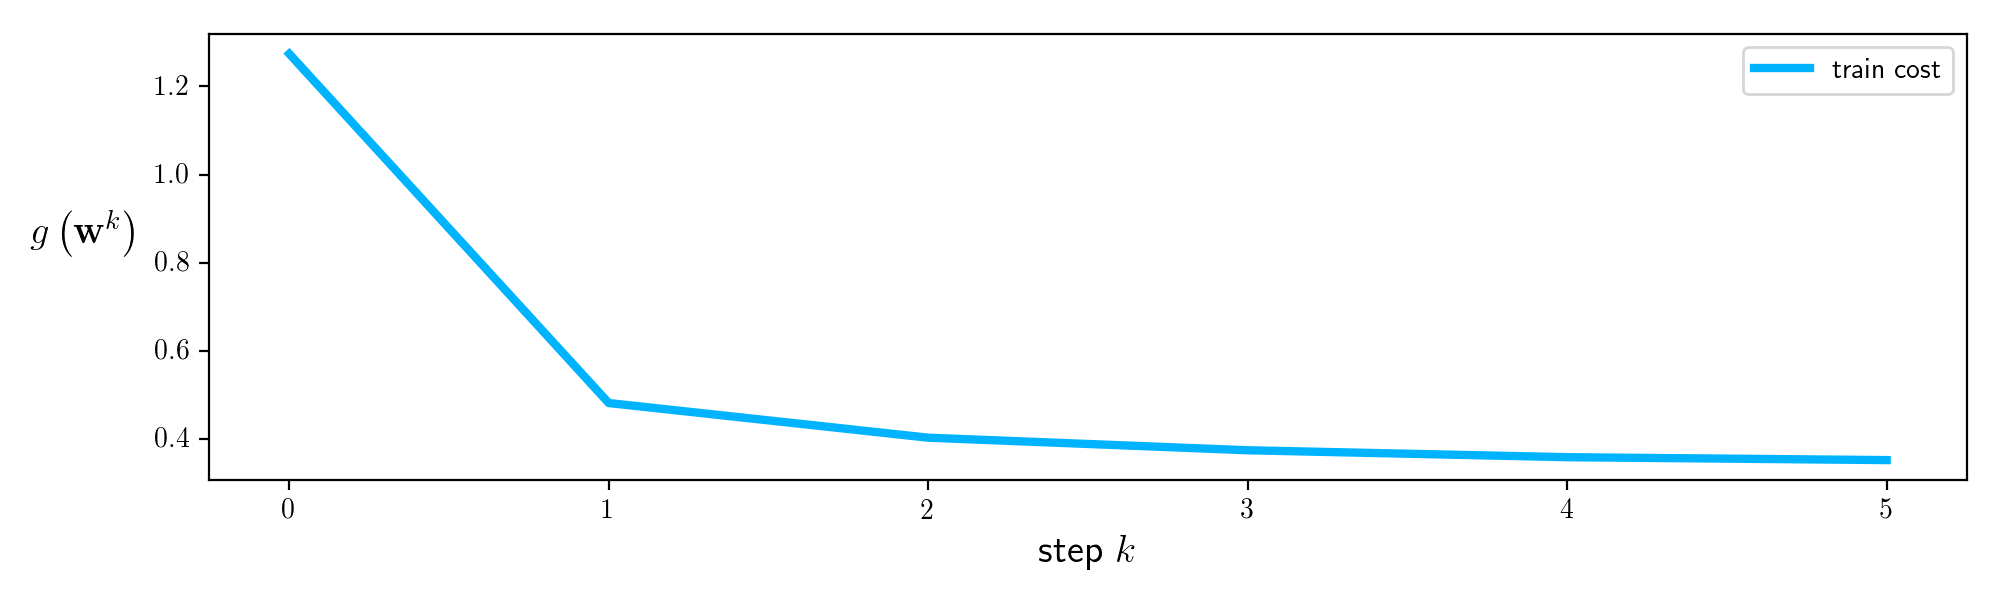

In [77]:
mylib1.show_histories()